In [345]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

from shutil import copyfile
from random import randrange
#data,
from skimage import img_as_float
from skimage import exposure

** plot the model: **

In [346]:
filename='Vp.segy'
with segyio.open(filename, "r" ) as segyfile:
    data  = segyfile.iline[segyfile.ilines[ii]]
    cube = segyio.tools.cube(filename)

np.shape(cube)
x=cube[:,0,:]
shap=np.shape(x)
nx=shap[0]
nz=shap[1]
print(nx)
print(nz)
xx=np.linspace(x0,x1,nx)
zz=np.linspace(z0,z1,nz) 

2721
701


6.25
5.0


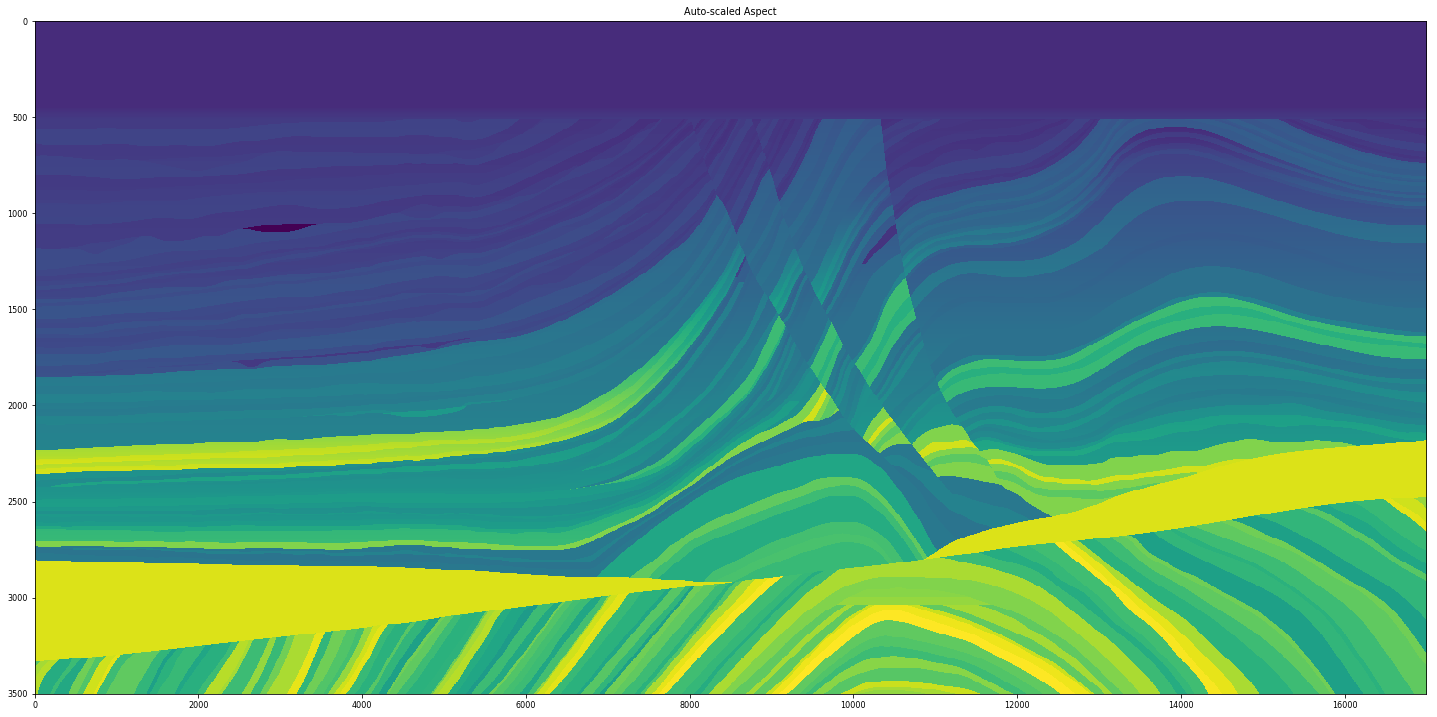

In [347]:
mod0=x.T
fig,ax2=plt.subplots(figsize=(20,10))
x0=0
x1=17000
z0=0
z1=3500
dx=(x1-x0)/(nx-1)
dz=(z1-z0)/(nz-1)
print(dx)
print(dz)
ax2.imshow(mod0, extent=[x0,x1,z1,z0], aspect='auto')
ax2.set_title('Auto-scaled Aspect')

plt.tight_layout()
plt.show()

** Plot the seismic: **

we have several available. Let's use prestack depth migration

In [348]:
ls *.segy

Kirchhoff_PoSDM.segy   Kirchhoff_PreSTM.segy             Vp.segy
Kirchhoff_PoSTM.segy   Kirchhoff_PreSTM_time.segy
Kirchhoff_PreSDM.segy  MODEL_P-WAVE_VELOCITY_1.25m.segy


In [349]:
#filename='Kirchhoff_PoSDM.segy'
filename='Kirchhoff_PreSDM.segy'
with segyio.open(filename, "r" ) as segyfile:
    cube = segyio.tools.cube(filename)
print(np.ndim(cube))
print(np.shape(cube))
np.shape(cube)
x=cube[:,0,:]
shap=np.shape(x)
nx=shap[0]
nz=shap[1]

3
(2721, 1, 701)


6.25
5.0


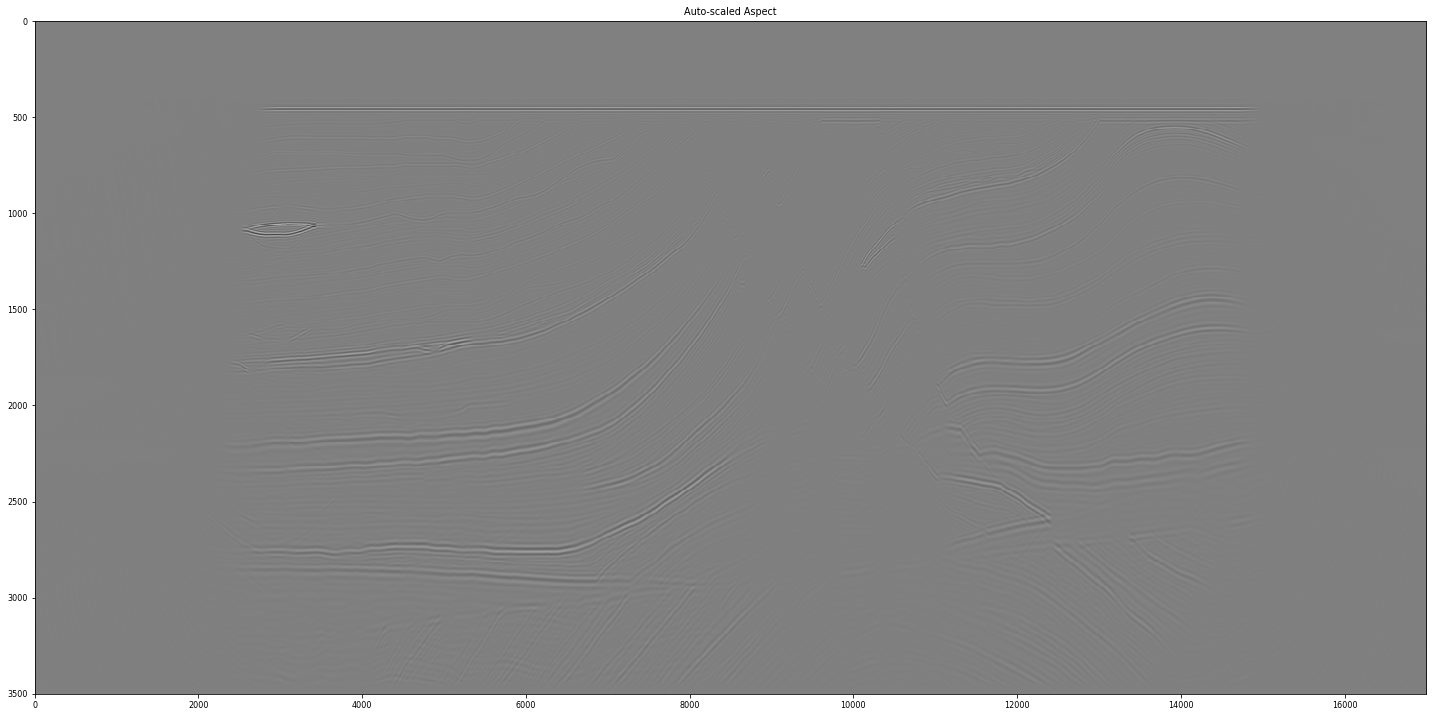

In [350]:
sei=x.T
fig,ax2=plt.subplots(figsize=(20,10))
x0=0
x1=17000
z0=0
z1=3500
dx=(x1-x0)/(nx-1)
dz=(z1-z0)/(nz-1)
print(dx)
print(dz)
ax2.imshow(sei, extent=[x0,x1,z1,z0], aspect='auto',cmap='gray', vmin=-1, vmax=1)
#ax2.imshow(grid, extent=[x0,x1,z1,z0], aspect='auto',cmap='gray', vmin=-.1, vmax=0.1)
ax2.set_title('Auto-scaled Aspect')

plt.tight_layout()
plt.show()

Disappointing resolution with this colorscale..Need to tweak the contrast a little.

This might screw up the amplitudes, but they're not "true" amplitudes anyway

Best to experiment a little and see what gives the best result..

http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

For now I used subsequently rescaling, equalization of exposure and adaptive equalization, in this order 

The order matters obviously and perhaps not all needed. Another thing to experiment with

In [310]:
img = sei
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
#img_eq = exposure.equalize_hist(img)
img_eq = exposure.equalize_hist(img_rescale)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img_eq, clip_limit=0.03)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


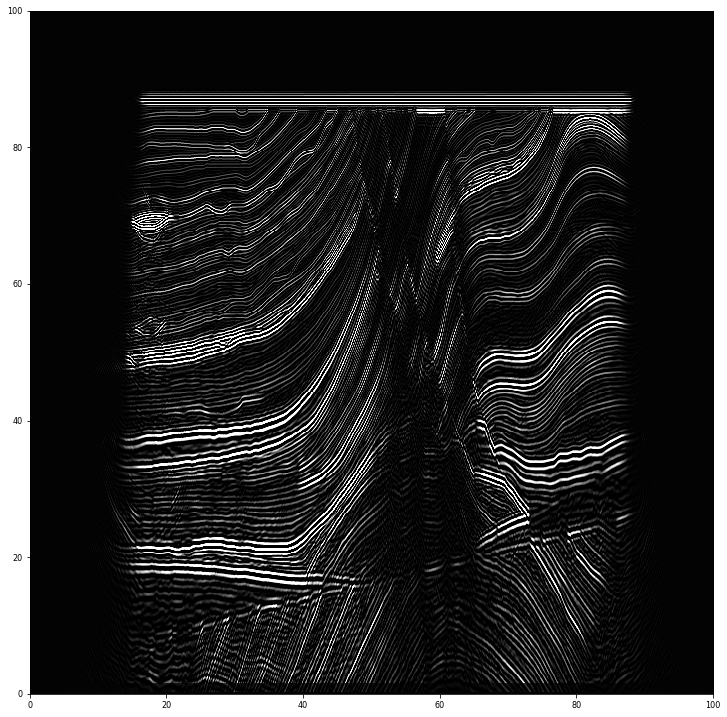

In [307]:
fig,ax2=plt.subplots(figsize=(20,10))
ax2.imshow(img_rescale,extent=[0,100 , 0, 100], cmap='gray', aspect=1, vmin=0, vmax=1)
plt.tight_layout()
plt.show()

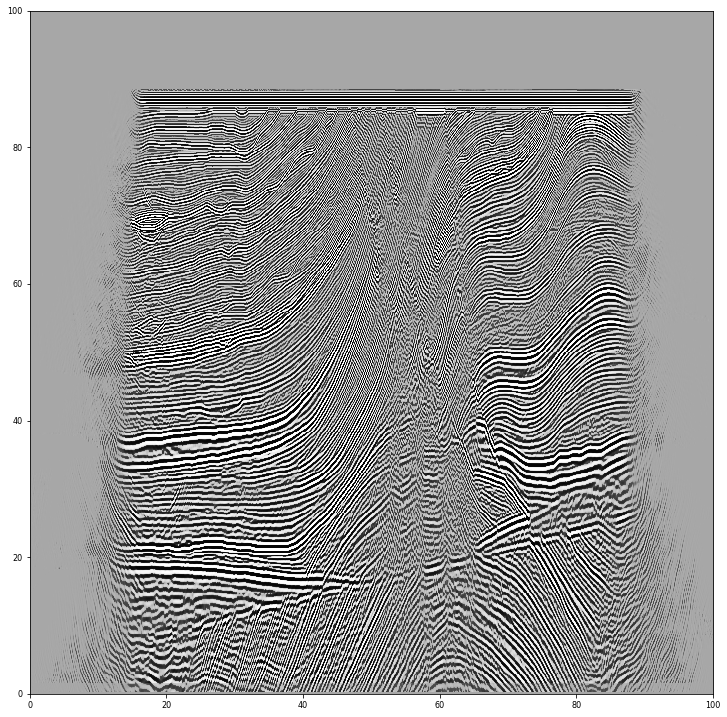

In [311]:
fig,ax2=plt.subplots(figsize=(20,10))
ax2.imshow(img_eq,extent=[0,100 , 0, 100], cmap='gray', aspect=1, vmin=0, vmax=1)
plt.tight_layout()
plt.show()

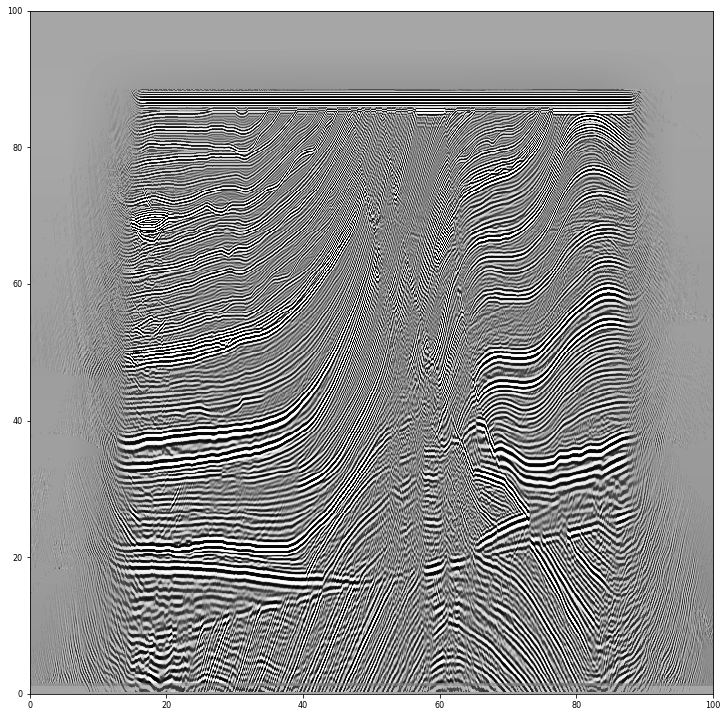

In [312]:
fig,ax2=plt.subplots(figsize=(20,10))
ax2.imshow(img_adapteq,extent=[0,100 , 0, 100], cmap='gray', aspect=1, vmin=0, vmax=1)
plt.tight_layout()
plt.show()

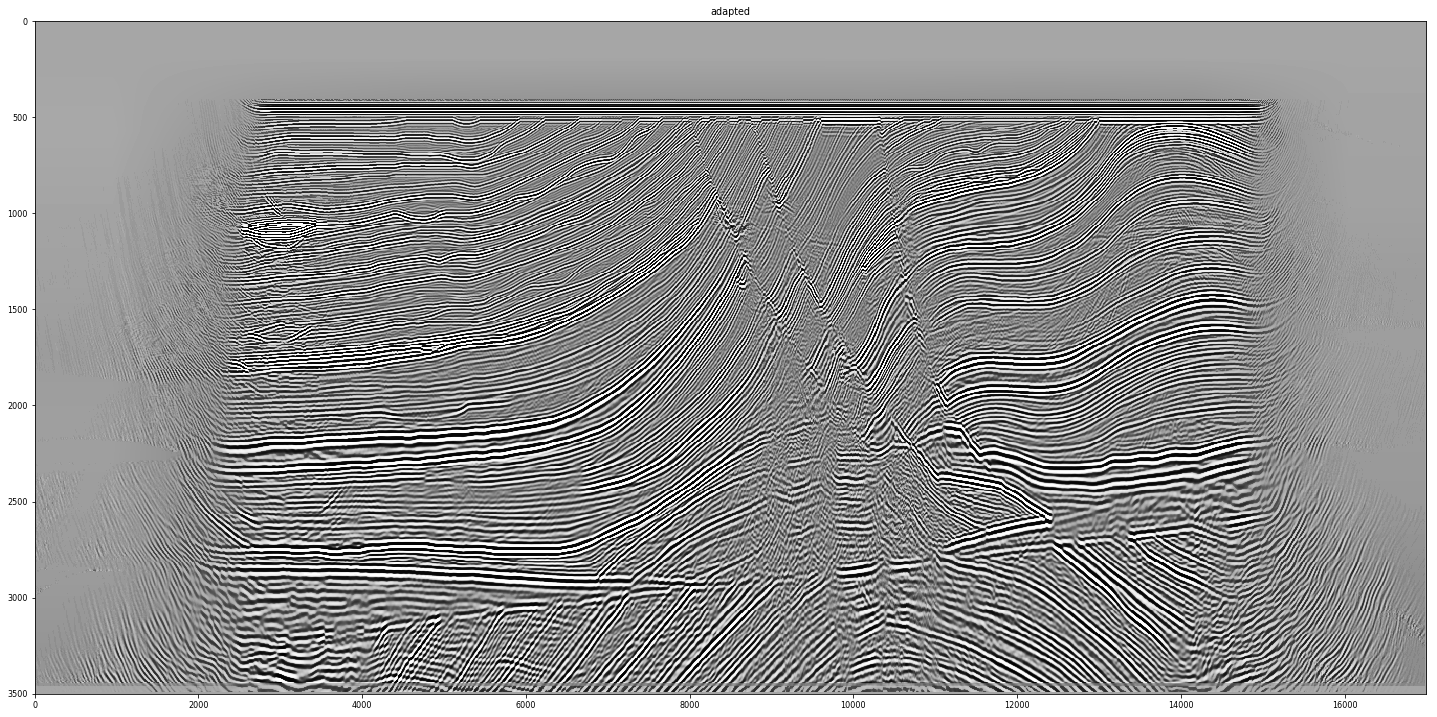

In [334]:
fig,ax2=plt.subplots(figsize=(20,10))
ax2.imshow(img_adapteq, extent=[x0,x1,z1,z0], aspect='auto',cmap='gray')
ax2.set_title('adapted')
plt.tight_layout()
plt.show()

select only the imaged bit:

In [226]:
seis=img_adapteq[60:,440:2281]
moda=mod0[60:,440:2281]
xx1=xx[440:2281]
zz1=zz[60:]
np.shape(seis)

(641, 1841)

flip it and add on the right:

In [318]:
right=np.fliplr(seis)
seis1=np.hstack((seis,right))

right1=np.fliplr(moda)
mod1=np.hstack((moda,right1))



get both between 0 and 1:

In [ ]:
tmp=seis1+np.amax(-(seis1))
seis2=tmp/np.amax(abs(tmp))

tmp=mod1+np.amax(-(mod1))
mod2=1-tmp/np.amax(abs(tmp))


In [315]:
print(np.shape(seis2))
print(np.shape(mod2))

(641, 3682)
(641, 3682)


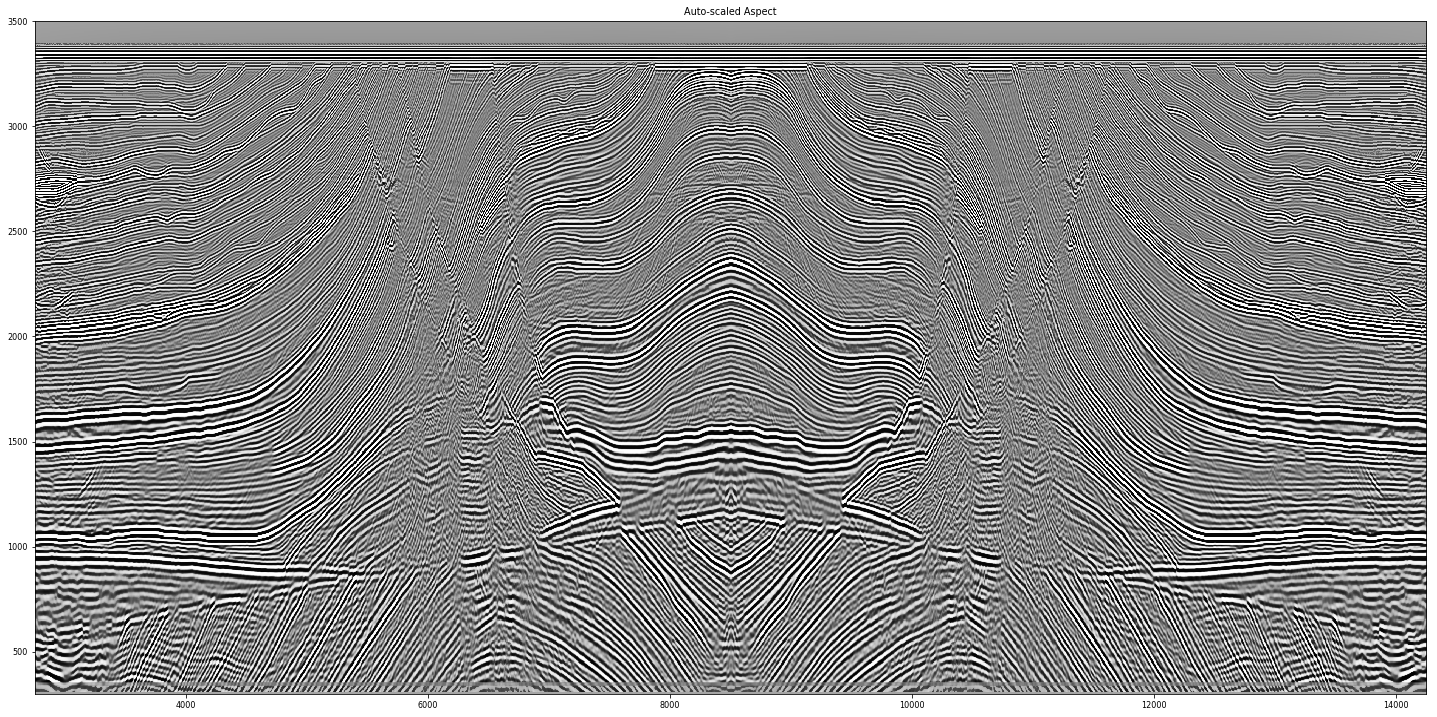

In [316]:
fig,ax2=plt.subplots(figsize=(20,10))
#ax2.imshow(img_rescale, extent=[x0,x1,z1,z0], aspect='auto',cmap='gray')
#ax2.imshow(img_eq, extent=[x0,x1,z1,z0], aspect='auto',cmap='gray')
ax2.imshow(seis2, extent=[xx1[0],xx1[-1],zz1[0],zz1[-1]], aspect='auto',cmap='gray', vmin=0, vmax=1)
ax2.set_title('seismic')
plt.tight_layout()
plt.show()

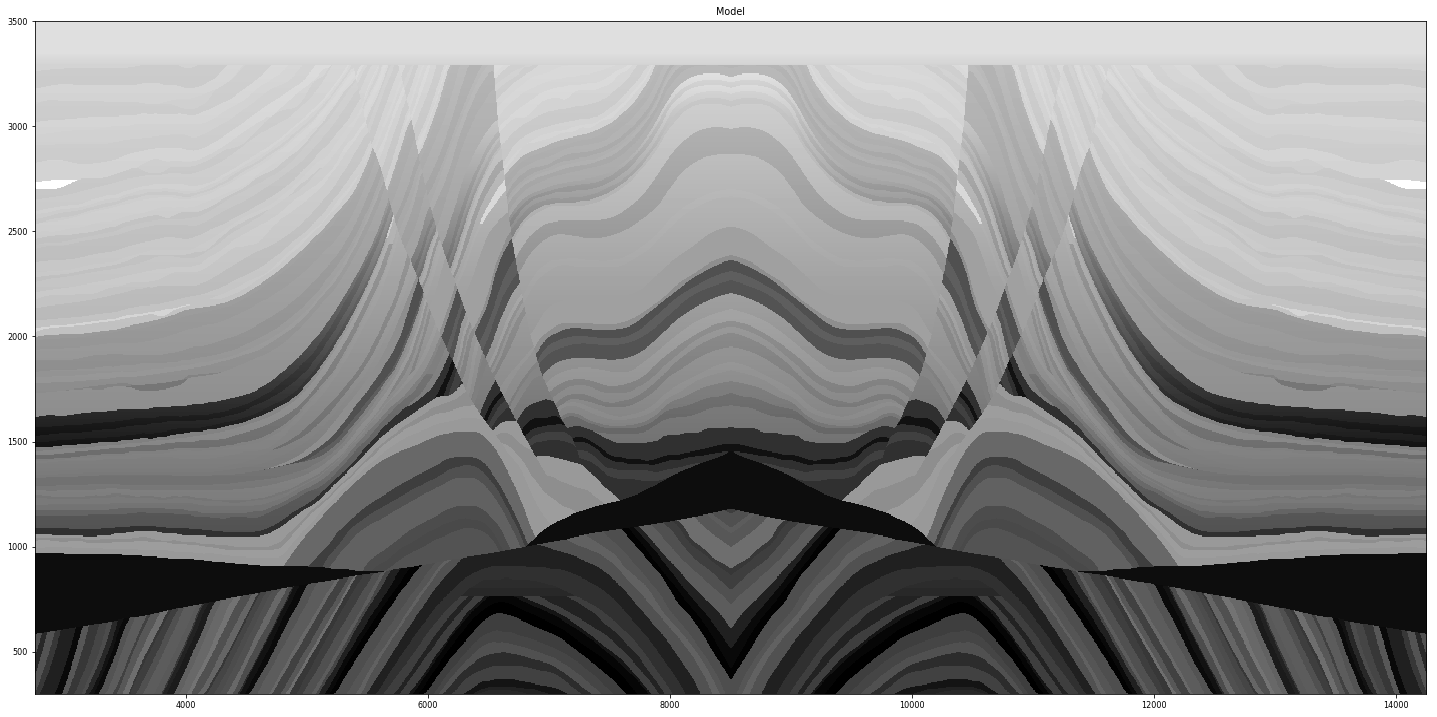

In [322]:
fig,ax2=plt.subplots(figsize=(20,10))
ax2.imshow(mod2, extent=[xx1[0],xx1[-1],zz1[0],zz1[-1]], aspect='auto',cmap='gray', vmin=0, vmax=1)
ax2.set_title('Model')
plt.tight_layout()
plt.show()

In [333]:
nx1=np.shape(seis2)[1]
nz1=np.shape(seis2)[0]
print(nx1)
print(nz1)


3682
641


605


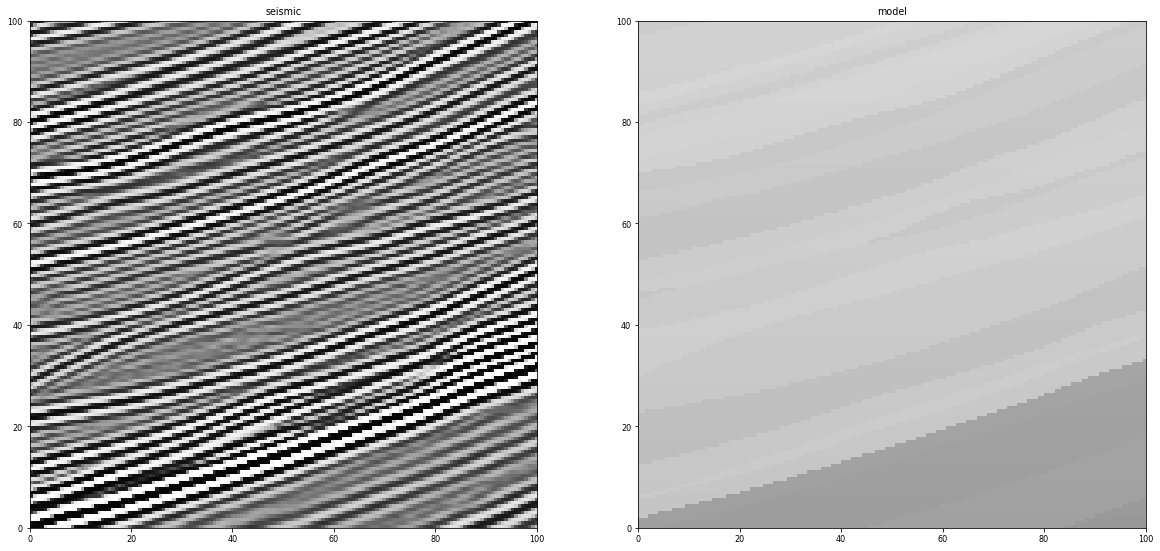

In [332]:
box_len=150
ii=randrange(0, nx-box_len)
jj=randrange(0, nz-box_len)
print(ii)

seis_small=seis2[jj:jj+box_len,ii:ii+box_len]
mod_small=mod2[jj:jj+box_len,ii:ii+box_len]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(seis_small, extent=[0,100 , 0, 100], cmap='gray', aspect='equal', vmin=0, vmax=1)
ax1.set_title('seismic')
ax2.imshow(mod_small, extent=[0,100 , 0, 100], cmap='gray', aspect='equal', vmin=0, vmax=1)
ax2.set_title('model')
plt.show()




In [331]:
box_len=150
for ii in range(20):
    name1='./seis/seis_' + str(ii)
    name2='./mods/mod_' + str(ii)
    ii=randrange(0, nx-box_len)
    jj=randrange(0, nz-box_len)
    seis_small=seis2[jj:jj+box_len,ii:ii+box_len]
    mod_small=mod2[jj:jj+box_len,ii:ii+box_len]
    #a = numpy.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
    a = np.asarray(seis_small)
    b = np.asarray(mod_small)
    np.savetxt(name1, a, delimiter=",")
    np.savetxt(name2, b, delimiter=",")

In [335]:
# plt.rcParams['font.size'] = 8


# def plot_img_and_hist(image, axes, bins=256):
#     """Plot an image along with its histogram and cumulative histogram.

#     """
#     image = img_as_float(image)
#     ax_img, ax_hist = axes
#     ax_cdf = ax_hist.twinx()

#     # Display image
#     ax_img.imshow(image, cmap=plt.cm.gray)
#     ax_img.set_axis_off()
#     ax_img.set_adjustable('box-forced')

#     # Display histogram
#     ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
#     ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
#     ax_hist.set_xlabel('Pixel intensity')
#     ax_hist.set_xlim(0, 1)
#     ax_hist.set_yticks([])

#     # Display cumulative distribution
#     img_cdf, bins = exposure.cumulative_distribution(image, bins)
#     ax_cdf.plot(bins, img_cdf, 'r')
#     ax_cdf.set_yticks([])

#     return ax_img, ax_hist, ax_cdf


# # Load an example image
# #img = data.moon()
# img = grid
# # Contrast stretching
# p2, p98 = np.percentile(img, (2, 98))
# img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# # Equalization
# img_eq = exposure.equalize_hist(img)

# # Adaptive Equalization
# img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# # Display results
# fig = plt.figure(figsize=(8, 5))
# axes = np.zeros((2, 4), dtype=np.object)
# axes[0, 0] = fig.add_subplot(2, 4, 1)
# for i in range(1, 4):
#     axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
# for i in range(0, 4):
#     axes[1, i] = fig.add_subplot(2, 4, 5+i)

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
# ax_img.set_title('Low contrast image')

# y_min, y_max = ax_hist.get_ylim()
# ax_hist.set_ylabel('Number of pixels')
# ax_hist.set_yticks(np.linspace(0, y_max, 5))

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
# ax_img.set_title('Contrast stretching')

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
# ax_img.set_title('Histogram equalization')

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
# ax_img.set_title('Adaptive equalization')

# ax_cdf.set_ylabel('Fraction of total intensity')
# ax_cdf.set_yticks(np.linspace(0, 1, 5))

# # prevent overlap of y-axis labels
# fig.tight_layout()
# plt.show()